In [ ]:
!pip install simpletransformers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

In [27]:
# stock_data = pd.read_csv("https://drive.google.com/file/d/1Ym4sWIkeZvHcYNX1frKXG5p22dPrFXBH/view?usp=sharing")
news = pd.read_csv("final_news_apple.csv")

In [3]:
df = pd.read_csv("all-data.csv",encoding='ISO-8859-1')

In [4]:
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [5]:
df = df.rename(columns={'neutral':'sentiment','According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'statement'})

In [6]:
df.shape

(4845, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4845 non-null   object
 1   statement  4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [8]:
df.describe()

,sentiment,statement
count,4845,4845
unique,3,4837
top,neutral,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
freq,2878,2


In [9]:
df.drop_duplicates(subset=['statement'],keep='first',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4837 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4837 non-null   object
 1   statement  4837 non-null   object
dtypes: object(2)
memory usage: 113.4+ KB


In [10]:
df.describe()

,sentiment,statement
count,4837,4837
unique,3,4837
top,neutral,Technopolis plans to develop in stages an area...
freq,2871,1


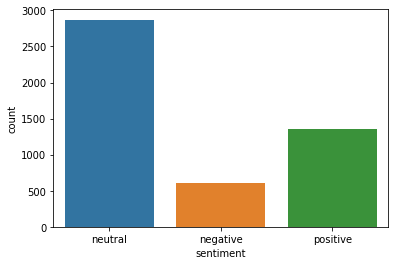

In [11]:
sns.countplot(x=df.sentiment)
plt.show()

In [12]:
df['sentiment'].value_counts()

neutral     2871
positive    1362
negative     604
Name: sentiment, dtype: int64

# Splitting into train and test

In [13]:
train,test = train_test_split(df,test_size = 0.2)

In [14]:
from simpletransformers.classification import ClassificationModel
# Create a TransformerModel
model = ClassificationModel('bert', 'bert-base-cased', num_labels=3, args={'reprocess_input_data': True, 'overwrite_output_dir': True},use_cuda=True)

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

In [15]:
# 0,1,2 : positive,negative
def making_label(st):
    if(st=='positive'):
            return 0
    elif(st=='neutral'):
            return 2
    else:
            return 1
                                        
train['label'] = train['sentiment'].apply(making_label)
test['label'] = test['sentiment'].apply(making_label)
print(train.shape)

(3869, 3)


In [16]:
train_df = pd.DataFrame({
      'text': train['statement'][:1500].replace(r'\n', ' ', regex=True),
      'label': train['label'][:1500]
})

test_df = pd.DataFrame({
      'text': test['statement'][-400:].replace(r'\n', ' ', regex=True),
      'label': test['label'][-400:]
})

In [17]:
test_df

,text,label
2767,"Additionally , the company will terminate a ma...",1
80,The fuel purchase contracts have been signed w...,2
3062,Okhta Center area is expected to have about 70...,2
1972,- Counter your competitor 's strengths and tar...,2
1001,"Simultaneously , his responsibility area is ex...",2
...,...,...
3134,"Subscribers of China Unicom , the nation 's se...",2
4726,Commission income fell to EUR 4.6 mn from EUR ...,1
2351,"H1 '08 H1 '07 Q2 '08 Q2 '07 in mln euro , unle...",2
4249,"The copying , republication or redistribution ...",2


In [18]:
model.train_model(train_df)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:602: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/1500 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/188 [00:00<?, ?it/s]

(188, 0.6139116693050304)

In [19]:
result, model_outputs, wrong_predictions = model.eval_model(test_df)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1443: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/400 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/50 [00:00<?, ?it/s]

In [31]:
prediction = model.predict(news['Headline'].to_list())

  0%|          | 0/22092 [00:00<?, ?it/s]

  0%|          | 0/2762 [00:00<?, ?it/s]

In [39]:
news["Predicted"] = prediction[0]

In [42]:
news["Predicted"].value_counts()

2    18095
0     2448
1     1549
Name: Predicted, dtype: int64

In [20]:
result

{'mcc': 0.7236160728863694, 'eval_loss': 0.3960985565185547}

In [21]:
lst = []
for arr in model_outputs:
    lst.append(np.argmax(arr))

In [22]:
true = test_df['label'].tolist()
predicted = lst

In [23]:
import sklearn
mat = sklearn.metrics.confusion_matrix(true , predicted)
mat

array([[ 97,   0,  18],
       [  4,  31,  11],
       [ 22,   5, 212]])

In [24]:
sklearn.metrics.accuracy_score(true,predicted) * 100 

85.0